In [18]:
import IPython
import os
os.system("ls [a-z]*.md | sed 's/\.md$//'| sort -u >ids.txt")
with open('ids.txt') as f:
    files = [ x.strip('\n') for x in f.readlines() ]
print (files)

['abrelsfo', 'acliff', 'ahranov', 'bfriend2', 'cbleker', 'cfabian', 'cpayne30', 'cshurtle', 'dagrawa2', 'dlowe7', 'dmagsby', 'dpak1', 'drao', 'eleffler', 'gjones2', 'gliso', 'hchoi6', 'jadams45', 'jande118', 'jcate6', 'jmill225', 'jswart1', 'jzhao25', 'kdawes', 'kgardn15', 'kwang40', 'kye2', 'miblake6', 'mmacneil', 'ngreen11', 'nshah7', 'pleffler', 'prq856', 'rriedel1', 'sbeztch1', 'smarcus5', 'snorem1', 'tricha32', 'wck942', 'wharri36', 'wileliff', 'wvaugha2', 'ztrzil']


In [19]:
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
documents = []

text = ""
for f in files:
  a = open (f+".md")
  str = a.read()
  documents .append(str)
  text = text + " " + str
      
#Do tf.idf magic 
tfidf = TfidfVectorizer().fit_transform(documents)
# no need to normalize, since Vectorizer will return normalized tf-idf
# we may want to see these, e.g., analyze in R
pd .DataFrame.from_records(tfidf.A).to_csv('tfidf.csv')

In [20]:
# Lets see the similarity matrix
# first create labels
idx = {}
for i in range(len(files)):
    idx[i] = files [i]

# Multiply the tfidf matrix to get all pairwise distances    
df = pd. DataFrame.from_records((tfidf * tfidf.T).A,columns=files)

#do pretty printing
pd.options.display.float_format = '{:20,.3f}'.format
df = df.rename(index=idx)
#Output to a file in case we want to look at it separately
df.to_csv("dist.csv")
df

,abrelsfo,acliff,ahranov,bfriend2,cbleker,cfabian,cpayne30,cshurtle,dagrawa2,dlowe7,...,rriedel1,sbeztch1,smarcus5,snorem1,tricha32,wck942,wharri36,wileliff,wvaugha2,ztrzil
abrelsfo,1.000,0.067,0.141,0.069,0.113,0.091,0.011,0.064,0.114,0.146,...,0.138,0.088,0.070,0.004,0.096,0.113,0.045,0.081,0.015,0.086
acliff,0.067,1.000,0.128,0.088,0.259,0.146,0.083,0.097,0.178,0.073,...,0.110,0.107,0.104,0.065,0.093,0.071,0.224,0.164,0.055,0.069
ahranov,0.141,0.128,1.000,0.101,0.115,0.121,0.160,0.083,0.138,0.078,...,0.111,0.108,0.105,0.124,0.063,0.191,0.128,0.174,0.088,0.202
bfriend2,0.069,0.088,0.101,1.000,0.108,0.140,0.047,0.055,0.090,0.056,...,0.060,0.114,0.094,0.048,0.076,0.142,0.096,0.053,0.048,0.099
cbleker,0.113,0.259,0.115,0.108,1.000,0.155,0.075,0.099,0.200,0.132,...,0.068,0.163,0.134,0.118,0.181,0.160,0.115,0.145,0.099,0.121
cfabian,0.091,0.146,0.121,0.140,0.155,1.000,0.029,0.069,0.146,0.116,...,0.162,0.255,0.137,0.040,0.187,0.121,0.083,0.079,0.120,0.115
cpayne30,0.011,0.083,0.160,0.047,0.075,0.029,1.000,0.060,0.056,0.066,...,0.138,0.049,0.033,0.058,0.050,0.090,0.175,0.244,0.015,0.197
cshurtle,0.064,0.097,0.083,0.055,0.099,0.069,0.060,1.000,0.062,0.139,...,0.156,0.079,0.070,0.026,0.089,0.103,0.065,0.075,0.055,0.083
dagrawa2,0.114,0.178,0.138,0.090,0.200,0.146,0.056,0.062,1.000,0.121,...,0.066,0.150,0.134,0.056,0.118,0.128,0.125,0.162,0.072,0.104
dlowe7,0.146,0.073,0.078,0.056,0.132,0.116,0.066,0.139,0.121,1.000,...,0.090,0.145,0.109,0.061,0.182,0.108,0.091,0.131,0.066,0.109


1.3516995263368496
[ 0.93294153]


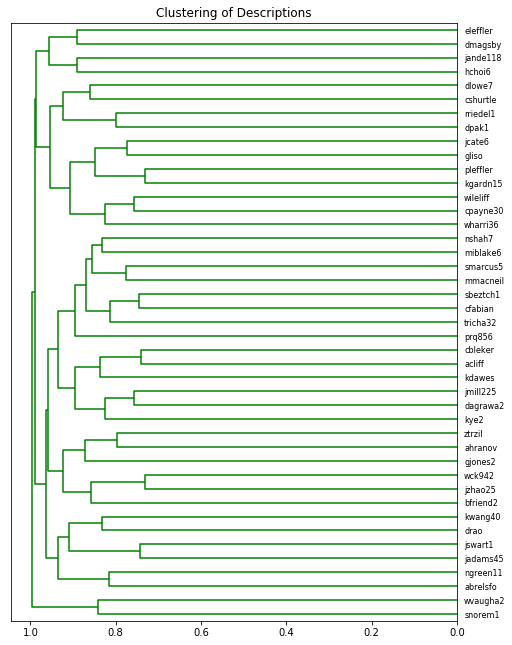

In [21]:
from scipy.cluster.hierarchy import linkage, ward, dendrogram
from scipy.spatial.distance import pdist
import math
import matplotlib.pyplot as plt
import numpy as np
import re

%matplotlib inline
# Clean up labels (remove .md at the end)
flab = files
for i in range(len(files)):
    flab[i] = re.sub(r"\.[mM][dD]$", "", files[i])


dist2 = pdist(tfidf.A, 'euclidean')
#dist ij = dist2 [i*(n-1)+j]
ab = np.dot(tfidf.A[0,:]-tfidf.A[42,:],
            tfidf.A[0,:]-tfidf.A[42,:])
aa = np.dot(tfidf.A[0,:],tfidf.A[0,:])
bb = np.dot(tfidf.A[42,:],tfidf.A[42,:])
print(math.sqrt(ab/aa/bb))


# Calculate cosine distance (clustering needs distance, not similarity)   
dist1 = pdist(tfidf.A, 'cosine')
print (dist1[:1])
# Do clustering
linkage_matrix = linkage(dist1,method='complete')
#print(linkage_matrix)
# Plot results
fig = plt.figure(1, figsize=(8, 11))
plt.clf()
ddata = dendrogram(linkage_matrix,
               color_threshold=1,
               p=97,
               labels=flab,
               truncate_mode='none',
               orientation='left',
                show_leaf_counts=True,
               )
plt.title("Clustering of Descriptions")
fig.savefig("teaming.png")


In [22]:
import networkx as nx
import json
nxg = nx.Graph()

for i in range(len(files)-1):
    for j in range(i+1,len(files)):
        if (df.iloc[i,j] > .2):
            nxg.add_edge(flab[i], flab[j], weight=df.iloc[i,j],color='r')
    
print (nxg.nodes())

['drao', 'dagrawa2', 'wharri36', 'eleffler', 'kwang40', 'wck942', 'kdawes', 'jadams45', 'tricha32', 'sbeztch1', 'kgardn15', 'dpak1', 'mmacneil', 'gliso', 'pleffler', 'cpayne30', 'wileliff', 'kye2', 'rriedel1', 'nshah7', 'jzhao25', 'smarcus5', 'cfabian', 'cbleker', 'ahranov', 'dlowe7', 'jcate6', 'jmill225', 'acliff', 'jswart1', 'ztrzil']


In [23]:
from networkx.readwrite import json_graph
nld = json_graph.node_link_data(nxg)
json.dump(nld, open('students.json','w'))

In [24]:
from IPython.display import IFrame
from IPython.core.display import display
# IPython Notebook can serve files and display them into
# inline frames. Prepend the path with the 'files' prefix.
viz_file = 'files/students.html'
display(IFrame(viz_file, '100%', '600px'))